(HW5)=
# HW5


## Task 5.1 (1.5 points)

For a one-dimensional gaussian $\xi \sim \mathcal N(\mu, \sigma^2)$ there are well-known rules of one, two and three sigmas:

* one-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant \sigma) = \Phi(1) - \Phi(-1) \approx 0.6827$ 
* two-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 2\sigma) = \Phi(2) - \Phi(-2) \approx 0.9545$ 
* three-sigma rule: $\mathbb P(\vert \xi - \mu \vert \leqslant 3\sigma) = \Phi(3) - \Phi(-3) \approx 0.9973$ 

```{figure} https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201202/20120208160239-1_0.jpg?itok=1X1a_HCs
:align: center
```

In [4]:
from scipy.stats import norm

norm.cdf(1) - norm.cdf(-1), norm.cdf(2) - norm.cdf(-2), norm.cdf(3) - norm.cdf(-3)

(0.6826894921370859, 0.9544997361036416, 0.9973002039367398)

Compute analagous values for a 2-d gaussian distribution $\boldsymbol \xi \sim \mathcal N(\boldsymbol 0, \boldsymbol I_2)$. Namely, find $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 1)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 2)$, $\mathbb P(\Vert\boldsymbol \xi\Vert_2 \leqslant 3)$.

**Note:** this problem assumes analytic solution. If you provide a reliable numeric solution, you'll receive $0.3$ points as bonus.

### My solution
Given that the 2D Gaussian distribution is rotationally symmetric around the origin, the probability of the Euclidean norm being less than or equal to a certain value 
$r$ is equivalent to the probability of a point falling within a circle of radius 
$r$ centered at the origin. 

The probability density function (PDF) of a 2D standard normal distribution is given by:
$$
f(x, \mu, \sum) = \frac{1}{\sqrt{(2\pi)^k \det(\sum)}} e^{-\frac{1}{2} ((x-\mu)^T \text{inv}(\sum) (x-\mu))}
\\
\text{k = dimension, in our case, k=2, 
x = input vector, } \mu \text{=mean, } \sum \text{=covariance matrix}
\\
\det(\sum) = \det(\text{2x2 identity matrix}) = 1
\\
\text{Covariance matrix = } \sum = \boldsymbol I_2
\\
\text{After all substitutions, we have:}
\\
f(\boldsymbol{\xi}) = \frac{1}{2\pi} e^{\left(-\frac{1}{2} (\xi_1^2 + \xi_2^2)\right)}
$$
Note that $x-\mu$ in the expressions above, is kind of difference of each values of input vector from mean value. 

This formula represents the likelihood of observing a particular point $(\xi_1, \xi_2)$ in the 2D space, where $\boldsymbol{\xi} = (\xi_1, \xi_2)$, under the standard normal distribution. The standard normal distribution is characterized by mean $\boldsymbol{\mu} = \boldsymbol{0}$ and covariance matrix $\boldsymbol{\Sigma} = \boldsymbol{I}_2$, where $\boldsymbol{I}_2$ is the $2 \times 2$ identity matrix. 

To compute the probabilities analytically, we integrate this PDF over the circular region defined by $||\xi||_2 \leq r$:
(geometric meaning: probability that $\xi$ located under volume(**double integral**) of shape):

* For $r$ = 1:
\begin{align*}
\mathbb{P}(\Vert \boldsymbol{\xi} \Vert_2 \leq 1) &= \iint_{\Vert \boldsymbol{\xi} \Vert_2 \leq 1} f(\boldsymbol{\xi}) \, d\boldsymbol{\xi} \\
&= \int_{-1}^{1} \int_{-\sqrt{1 - \xi_1^2}}^{\sqrt{1 - \xi_1^2}} \frac{1}{2\pi} \exp\left(-\frac{1}{2} (\xi_1^2 + \xi_2^2)\right) \, d\xi_2 \, d\xi_1
\end{align*}

* For $r$ = 2:
\begin{align*}
\mathbb{P}(\Vert \boldsymbol{\xi} \Vert_2 \leq 2) &= \iint_{\Vert \boldsymbol{\xi} \Vert_2 \leq 2} f(\boldsymbol{\xi}) \, d\boldsymbol{\xi} \\
&= \int_{-2}^{2} \int_{-\sqrt{4 - \xi_1^2}}^{\sqrt{4 - \xi_1^2}} \frac{1}{2\pi} \exp\left(-\frac{1}{2} (\xi_1^2 + \xi_2^2)\right) \, d\xi_2 \, d\xi_1
\end{align*}

* For $r$= 3:
\begin{align*}
\mathbb{P}(\Vert \boldsymbol{\xi} \Vert_2 \leq 3) &= \iint_{\Vert \boldsymbol{\xi} \Vert_2 \leq 3} f(\boldsymbol{\xi}) \, d\boldsymbol{\xi} \\
&= \int_{-3}^{3} \int_{-\sqrt{9 - \xi_1^2}}^{\sqrt{9 - \xi_1^2}} \frac{1}{2\pi} \exp\left(-\frac{1}{2} (\xi_1^2 + \xi_2^2)\right) \, d\xi_2 \, d\xi_1
\end{align*}

These integrals do not have elementary antiderivatives, but they can be evaluated numerically.

**Note:** If you provide a reliable numeric solution, you'll receive $0.3$ points as bonus:
We can solve these probabilities using numerical methods or specialized packages in python:

In [10]:
# Numerical solution
import numpy as np
from scipy.integrate import dblquad

# Define the PDF of the standard 2d normal distribution
# xi_1 = x, xi_2 = y
def gaussian_pdf(xi_1, xi_2):
    return (1 / (2 * np.pi)) * np.exp(-0.5 * (xi_1**2 + xi_2**2))

# Define the integrand for the given radius
def integrand(xi_1, xi_2):
    return gaussian_pdf(xi_1, xi_2)

# Define the function to compute the probability for a given radius
# scipy.integrate.dblquad --> Compute a double integral, return the double (definite) integral 
# dblquad returns a tuple containing two elements: the first element is the value of the integral, and the second element is an estimate of the absolute error in the result.
def compute_probability(r):
    return dblquad(integrand, -r, r, lambda x: -np.sqrt(r**2 - x**2), lambda x: np.sqrt(r**2 - x**2))[0]

# Compute the probabilities for r = 1, 2, 3
radii = [1, 2, 3]
probabilities = [compute_probability(r) for r in radii]

# Print the results
for r, value in zip(radii, probabilities):
    print(f"P(||ξ||_2 ≤ {r}) = {value:.6f}")


P(||ξ||_2 ≤ 1) = 0.393469
P(||ξ||_2 ≤ 2) = 0.864665
P(||ξ||_2 ≤ 3) = 0.988891


## Task 5.2 (1.5 points)

Let $X_1, \ldots, X_n$ is an i.i.d. sample from $\mathcal N(0, \sigma^2)$ and $\widehat \sigma = \frac 1n \sum\limits_{i=1}^n |X_i|$.

* Find bias, se and MSE of the estimation $\widehat \sigma$. Is this estimation unbiased? (**0.7 points**)
* If $\widehat \sigma$ turned out to be biased, fix it to get an unbiased estimation of $\sigma$. Find se of this corrected estimation. Is it consistent? Justify your answer. (**0.8 points**)

### My solution
Given $X_1,..., X_n$ they are independent and identically distributed samples from $N(0, \sigma^2)$, $\mu=0$ and variance=$\sigma^2(dispersion)$. Since, our $\mu=0$, half of distribution is positive, i.e the abs value of normmally distributed r.v $X_i$ follows a half-normal distribution with scale(spread(распространение или шкала)) parameter $\sigma$.

* Solution for: Find bias, se and MSE of the estimation $\widehat \sigma$. Is this estimation unbiased? 


**Finding bias**:

$Bias(\widehat \sigma) = E(\widehat \sigma) - \sigma$.

Calculating expected value of $\widehat \sigma$:
$$
E(\widehat \sigma) = E(\frac{1}{n}\sum_1^n|X_i|)
\\
 = \frac{1}{n} \sum_1^n E|X_i|
\\
= \frac{1}{n} \sum_1^n \sqrt{\frac{2}{\pi}} \cdot
\widehat \sigma, \quad \text{Since we take absolute value, expected value will be mean of half-normal distribution}
\\
= \sqrt{\frac{2}{\pi}} \cdot \widehat \sigma
\\
E(\widehat \sigma) =  \sqrt{\frac{2}{\pi}} \cdot \widehat \sigma
$$
Variance of $\widehat \sigma$:
$$
Var(\widehat \sigma)=Var(\frac{1}{n}\sum_1^n|X_i|) 
\\
= \frac{1}{n^2} \sum_1^n Var(|X_i|)
\\
=\frac{1}{n^2} \sum_1^n (\sigma^2 - (\sqrt{\frac{2}{\pi}} * \sigma)^2) \text{, (Variance of half-normal distribution)}
\\
= \frac{1}{n^2} \sum_1^n (\sigma^2 - \frac{2}{\pi} \sigma^2) 
\\
= \sigma^2 (1-\frac{2}{\pi})
\\
Var(\widehat \sigma) = \sigma^2 (1-\frac{2}{\pi})
$$

$Bias(\widehat \sigma) = E(\widehat \sigma) - \sigma = \sqrt{\frac{2}{\pi}} \cdot \sigma - \sigma = \sigma(\sqrt{\frac{2}{\pi}} - 1)$

**Biased.**

**Finding standard error(SE) of $\widehat \sigma$**:
The standard error is kind of estimate of the standard deviation of the error term. So it is the square root of the variance, and that depends on our true(actual) st.deviation $\sigma$:
$$
SE(\widehat \sigma) = \sigma \sqrt{(1-\frac{2}{\pi})}
$$

**MSE(mean square error) of $\widehat \sigma$**:
$$
MSE(\widehat \sigma) = Var(\widehat \sigma) + Bias(\widehat \sigma)^2
\\
= (1-\frac{2}{\pi}) \sigma^2 + ((\sqrt{\frac{2}{\pi}} - 1)\sigma)^2
\\
= (2-2\sqrt{\frac{2}{\pi}}) \sigma^2
$$

* If $\widehat \sigma$ turned out to be biased, fix it to get an unbiased estimation of $\sigma$. Find se of this corrected estimation. Is it consistent? Justify your answer. 


Unbiased estimator for $\sigma$ is the sample st.deviation $S$, given by:
$$
S = \sqrt{\frac{1}{n-1}\sum_{i = 1}^n(X_i-X_{\text{average}})^2}
$$
$X_{\text{average}} $ is sample mean. S directly proporsional to $X_{\text{average}}$.



Remember that we had:$ E(\widehat \sigma) =  \sqrt{\frac{2}{\pi}} \cdot \widehat \sigma $.

$E(S)$ directly proportional to $\sigma$(стандартное отклонение для нормального распрделения). Also, $E(\widehat \sigma)$ directly proportional to $\widehat \sigma$. Mean of second that is linked with sigma with head is sigma with coefficient 2/pi.  (Среднее значение второго тоже прямо поропроциональна к сигме и с коэффициентом 2/pi.). So to fix biased version of st.deviation:
 Значит чтобы исправить погрешную сигму которая во второй форме с шапкой, мы должны иметь вот такую форму: 

$$
   E(\sigma) \sim \sigma
   \\
   E(\widehat \sigma) = \sqrt{\frac{2}{\pi}} \widehat \sigma
   \\
   E(\sigma) \sim  E(\widehat \sigma) 
   \\
   \sigma =  \sqrt{\frac{2}{\pi}} \widehat \sigma
   \\
   \sigma = 
   \widehat \sigma_{\text{correct}} = \sqrt{\frac{2}{\pi}} \cdot \widehat \sigma
$$
Now, let's find the standard error of this corrected estimator and discuss its consistency.

**Standard error(SE) of** $\widehat \sigma_{\text{corrected}}$ :


$$
SE(\widehat \sigma_{\text{corrected}}) \sim \sigma
\\
SE(\widehat \sigma_{\text{corrected}}) \sim \widehat \sigma_{\text{correct}}
\\
SE(\widehat \sigma_{\text{corrected}}) = \sqrt{\frac{2}{\pi}} \cdot SE(\widehat \sigma)
\\
= \sqrt\frac{2}{\pi} \cdot \sigma \cdot \sqrt{1-\frac{2}{\pi}} 
\\
= \sigma \sqrt{(\frac{2}{\pi}(1-\frac{2}{\pi}))} 
\\
= \sigma \sqrt{\frac{2}{\pi} - \frac{4}{\pi^2}} 
\\ 
= \sigma \sqrt{\frac{2\pi - 4}{\pi^2}} = 0.48 \sigma
$$

It is not consistent, since, $0.48 \sigma$ suggests that there is still some level of variability in the estimator, which does not decrease to zero as 
n increases.

## Task 5.3 (1 point)


Let $X_1, \ldots, X_n$ is an i.i.d. sample form $U[0, 2\theta]$. The parameter $\theta$ can be estimated as
$\widehat\theta = \overline X_n$ (sample average) or $\tilde\theta = \mathrm{med}(X_1, \ldots, X_n)$ (sample median). According to ML Handbook, both estimations are unbiased, and $\mathbb V \widehat\theta = \frac{\theta^2}{3n}$, $\mathbb V \tilde\theta = \frac{\theta^2}{n+3}$. Hence, due to the central limit theorem

$$
    \widehat\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{3n}\Big), \quad
    \tilde\theta \approx \mathcal N\Big(\theta, \frac{\theta^2}{n+3}\Big), \quad n \gg 1.
$$

Plot two histograms on the same plot verifying this theoretical statements. Add two dashed lines for gaussians as it done {ref}`here <CLT>`.

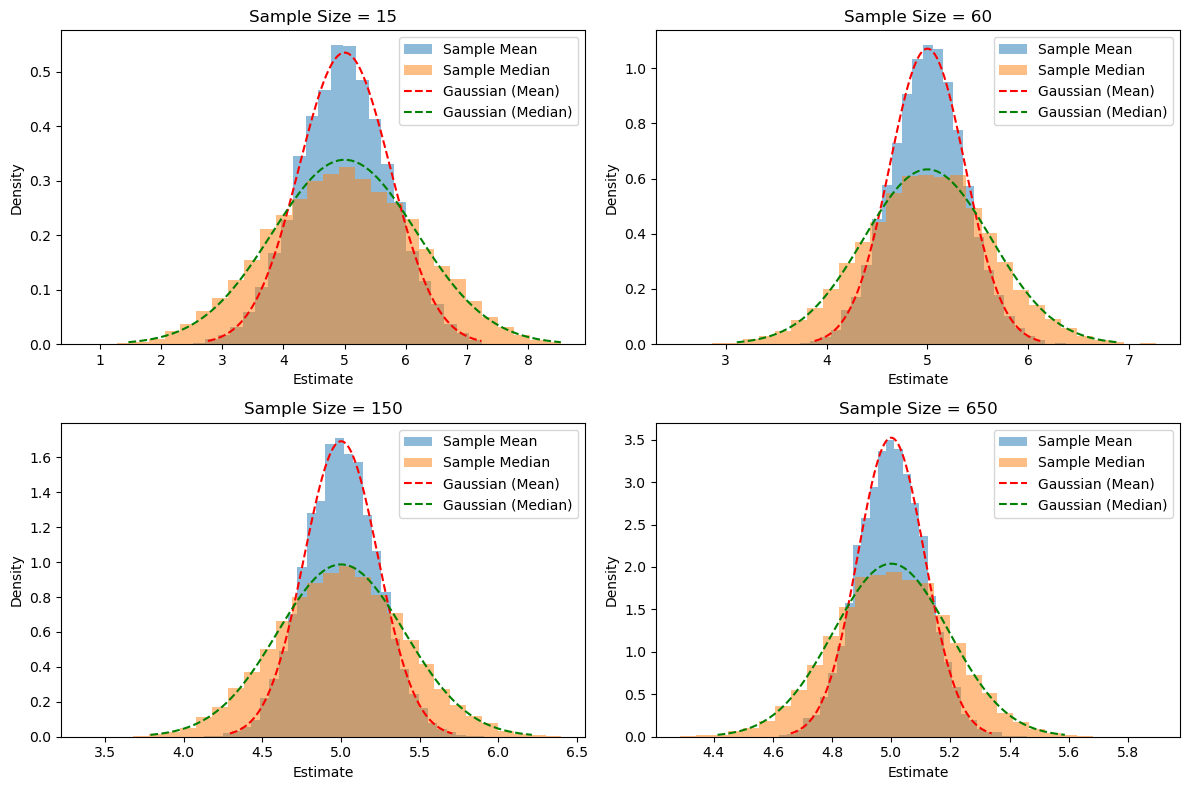

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Function to calculate theoretical standard deviation for sample mean
def theoretical_std_dev_mean(theta, n):
    return np.sqrt((theta**2) / (3 * n))

# Function to calculate theoretical standard deviation for sample median value
def theoretical_std_dev_median(theta, n):
    return np.sqrt((theta**2) / (n + 3))

theta = 5  # True value of theta
num_samples = 10000  # Count of samples to generating
sample_sizes = [15, 60, 150, 650]
# Generate samples and calculate estimators
estimates_mean = {}
estimates_median = {}
for n in sample_sizes:
    samples = np.random.uniform(0, 2 * theta, size=(num_samples, n))
    sample_means = np.mean(samples, axis=1)
    sample_medians = np.median(samples, axis=1)
    estimates_mean[n] = sample_means
    estimates_median[n] = sample_medians

# Plot histograms and Gaussian distributions
plt.figure(figsize=(12, 8))

for i, n in enumerate(sample_sizes):
    plt.subplot(2, 2, i+1)
    plt.hist(estimates_mean[n], bins=30, density=True, alpha=0.5, label='Sample Mean')
    plt.hist(estimates_median[n], bins=30, density=True, alpha=0.5, label='Sample Median')
    
    # Plot Gaussian distributions
    x = np.linspace(theta - 3 * theoretical_std_dev_mean(theta, n), theta + 3 * theoretical_std_dev_mean(theta, n), 100)
    plt.plot(x, norm.pdf(x, loc=theta, scale=theoretical_std_dev_mean(theta, n)), 'r--', label='Gaussian (Mean)')
    
    x = np.linspace(theta - 3 * theoretical_std_dev_median(theta, n), theta + 3 * theoretical_std_dev_median(theta, n), 100)
    plt.plot(x, norm.pdf(x, loc=theta, scale=theoretical_std_dev_median(theta, n)), 'g--', label='Gaussian (Median)')
    
    plt.title(f'Sample Size = {n}')
    plt.xlabel('Estimate')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()
